In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from random import randint
from IPython.display import Image, HTML

In [7]:
# Disable plot axes by default
if True:
    mpl.rc('axes.spines', top=False, bottom=False, left=False, right=False)
    mpl.rc('xtick', top=False, bottom=False, labelsize=0)
    mpl.rc('ytick', left=False, right=False, labelsize=0)

# Hamiltonian cycles

In [8]:
def find_non_hamiltonian_node_subset(edges=[], strict=True):
    g = nx.from_edgelist(edges)
    nodes = sorted(list(g.nodes))
    visited_subsets = set()
    results = []

    def check_set(s):
        visited_subsets.add(s)
        g_minus = g.copy()
        g_minus.remove_nodes_from(s)
        c = nx.number_connected_components(g_minus)
        if (strict and c > len(s)) or (not strict and c >= len(s)):
            if c > 1 and s not in results: 
                results.append(s)

    def enter_subset(s):
        if len(s) > len(nodes) or s in visited_subsets:
            return
        check_set(s)
        for n in nodes:
            enter_subset(s.union([n]))

    enter_subset(frozenset())
    return [sorted(s) for s in results]

### TODO

Как доказать что самый правый граф из задания на странице
[link](https://stepik.org/lesson/11774/step/5)
не имеет Гамильтонова цикла?

![strange graph](hamilton-graphs/why-this-graph-isnot-hamiltonian.png)

Алгоритм ниже показывает, что нельзя найти такое подмножество вершин, которое при удалении создавало бы компонент связности больше своего размера. :(

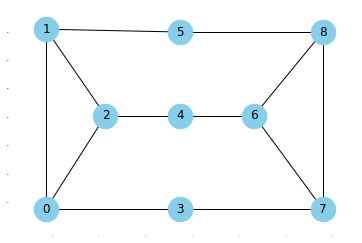

In [25]:
nhg = nx.read_graphml('hamilton-graphs/why-is-graph-isnot-hamiltonian.graphml')
nhg = nhg.to_undirected()
nhg = nx.relabel_nodes(nhg, {n: int(d['label']) for n,d in nhg.node.data()})
nhg_pos = {n: (float(d['x']), -float(d['y'])) for n,d in nhg.node.data()}
nx.draw_networkx(nhg, pos=nhg_pos, node_size=600, node_color='skyblue')

In [21]:
find_non_hamiltonian_node_subset(strict=True, edges=[
    (0,1),(0,2),(0,3),(1,2),(1,5),(2,4),
    (3,7),(4,6),(5,8),(6,7),(6,8),(7,8)
])

[]

## Примеры негамильтоновых графов

![non-hamiltonian-1](hamilton-graphs/non-hamiltonian-example-1.png)

![non-hamiltonian-2](hamilton-graphs/non-hamiltonian-example-2.png)

## Более сложный негамильтонов граф

<img alt="non-hamiltonian" src="hamilton-graphs/non-hamiltonian-example-3.png"
     style="width:60%; min-width:200px;">

В ячейке ниже находится подмножество вершин, которое сильно разрывает граф (а значит, он не гамильтонов).

In [10]:
find_non_hamiltonian_node_subset(strict=True, edges=[
    (0,1),(0,4),(0,3),(1,2),(1,8),(1,7),
    (2,5),(2,3),(3,9),(3,10),(4,7),(4,9),
    (5,8),(5,10),(6,7),(6,8),(6,9),(6,10)
])

[[1, 3, 4, 5, 6]]

# Задача

![homework-hamiltonian-step10](hamilton-graphs/homework-hamiltonian-step10.png)

([ссылка](https://stepik.org/lesson/11774/step/10))

1. Доказать, что в графе есть гамильтонов путь.
2. Проверить выполнение достаточного критерия существования гамильтонова цикла: $deg(x_1)+deg(x_n) \geqslant n$
3. Доказать отсутствие гамильтонова цикла.
 
### Решение

1) Простой Гамильтонов путь имеется, например: `6-3-0-1-4-5-2`

2) Достаточное условие на этом пути не выполняется, так как:
  - `длина пути` = 7 вершин
  - `степень начальной вершины 6` = 4
  - `степень конечной вершины 2` = 2
  - но $2 + 4 < 7$

3) Гамильтонов цикл в этом графе построить нельзя. Гамильтонов цикл должен включать три внутренних вершины (1,2,3). Вершина 1 имеет степень 2, и цикл обязан содержать оба её ребра, в том числе ребро $[0-1]$. Аналогично рассуждая для вершин 2 и 3, получаем, что цикл должен содержать рёбра $[0-2]$ и $[0-3]$. А значит, вершина 0 должна входить в цикл вместе с 3-мя инцидентными ей рёбрами. Но это невозможно, поскольку в Гамильтонов цикл вместе с любой вершиной могут входить только два ребра.


# Свойство

Пусть $P=x_1,\dots,x_k$, $k>2$, есть наибольший по включению простой путь в графе $G$. Тогда этот путь можно превратить в простой цикл $C$ либо в случае, когда концы пути $P$ - вершины $x_1$ и $x_k$ - являются смежными, либо в случае, когда сумма степеней этих вершин больше или равна $k$:

$$ deg(x_1)+deg(x_k) \ge k $$

### Доказательство

Если $x_1$ и $x_k$ смежны, то просто добавляем к пути $P$ ребро $\{x_k,x_1\}$ и получаем простой цикл $C = P \cup \{x_k,x_1\}$.

Если они несмежны, то сделаем так.

Сначала покажем, что вершины, не вошедшие в рассматриваемый путь, не смежны с его концами.
Действительно, если бы это было так, то их можно было бы добавить в путь,
но тогда исходный уже не был бы наибольшим по включению, противоречие.
Тогда все вершины, выходящие из начала и конца пути ведут лишь в вершины,
содержащиеся в рассматриваемом пути.

Построим подграф $H$ графа $G$, в который включим только $k$ вершин, входящих в путь $P$, а также все рёбра из графа $G$, которые инцидентны этим вершинам (в том числе рёбра, входящие в путь $P$). В силу показанного выше при "удалении" вершин вне пути степени конечных вершин не изменятся.

Размер графа $H$ равен $k$. Путь $P$ является Гамильтоновым в графе $H$. По доказанному на лекции критерию достаточности в графе $H$ можно построить Гамильтонов цикл $C$, включающий все вершины $x_1, \dots, x_k$. Он же будет и циклом в графе $G$ (ведь он состоит только из вершин и рёбер графа $G$), хотя не обязательно Гамильтоновым.

# Количество гамильтоновых циклов в полном графе $K_n$
 - число вариантов выбрать 1-ю вершину = $n$ $\implies$ умножаем на $n$
 - но $n$ замкнутых циклов равнозначны $\implies$ делим на тот же $n$
 - у первой вершины $n-1$ вариантов куда отправиться,
   у 2-й вершины $n-2$ итд; итого $(n-1)!$ для каждой вершины
 - половина циклов - перевернутые варианты имеющихся
   (например `1-2-3-4-1` и `1-4-3-2-1`), но граф неориентированный
   $\implies$ делим на 2
 - итого: $\frac12(n-1)!$

# В турнире существует гамильтонов путь

Турнир $T$ -- орграф, полученный из полного графа $K_n$ произвольной ориентацией его ребер.

### Доказательство

Это можно доказать по индукции.
Как базу индукции берём турнир из **трёх** вершин.
Тут всегда имеется одна вершина с двумя входящими рёбрами, другая с двумя исходящими,
третья с одним входящим и одним исходящим.
Первую поставим в начало пути, вторую в конец, третью в середину.

![turnir 3](hamilton-graphs/turnir-ham-3.png)

Теперь предположим, что индукция выполнена для турнира из $n$ вершин,
то есть для них **уже** нашёлся Гамильтонов путь $[(v_1,v_2),(v_2,v_3),...,(v_{n-1},v_n)]$.
Добавим к турниру вершину $v_{n+1}$.
Так как это турнир, то она имеет с **каждой** из вершин $v_1,...,v_n$ входящее или исходящее ребро.
Попробуем добавить её в путь так, чтобы он остался Гамильтоновым.
Рассмотрим четыре варианта событий:

1. Все инцидентные $v_{n+1}$ рёбра **входят** в неё.
   Тогда просто добавим $(v_n,v_{n+1})$ в **конец** пути.
2. Все инцидентные $v_{n+1}$ рёбра **выходят** из неё.
   Тогда просто добавим $(v_{n+1},v_1)$ в **начало** пути.
3. Из $v_{n+1}$ есть как входящие так и исходящие рёбра, причем $(v_{n+1},v_1)$ - исходящее.
   Вновь добавим вершину в **начало** пути.
4. Из $v_{n+1}$ есть как входящие так и исходящие рёбра, но $(v_1,v_{n+1})$ входящее.
   Начнём просматривать рёбра между $v_{n+1}$ и последовательно $v_2,v_3,\dots,v_n$
   **в порядке Гамильтонова пути**, пока не найдём **первое исходящее** $(v_{n+1},v_i)$.
   Но предыдущее просмотренное ребро $(v_{i-1},v_{n+1})$ было входящим.
   Модифицируем Гамильтонов путь так: удалим ребро $(v_{i-1},v_i)$
   и на его место вставим пару $(v_{i-1},v_{n+1}),(v_{n+1},v_i)$.
   На рисунке показаны для примера только рёбра нового пути, а прочие опущены:

![turnir n](hamilton-graphs/turnir-ham-n.png)

Во всех случаях полученный путь опять будет Гамильтоновым.
Радостно заключаем, что индукция работает для любого $n$.